<h1>Model Training</h1>

<h3>Import Data and Packages</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Import CSV Dasta as PD Dataframe

In [2]:
df = pd.read_csv(r"C:\Users\Tnluser\Desktop\DS Stats\E2E DS Propjects\1. First Projects\notebook\data\stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
X = df.drop(columns=['math_score'],axis = 1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [4]:
y = df.math_score
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

Transform Categorical and Numeric Columns

In [6]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

#segregating categogrical ans numerical feature from X
num_feature = X.select_dtypes(exclude='object').columns
cat_feature = X.select_dtypes(include='object').columns

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',cat_transformer,cat_feature),
        ('StandardScaler',num_transformer,num_feature)
    ]
)

X = preprocessor.fit_transform(X)

In [12]:
X.shape

(1000, 19)

In [15]:
# Seperate Data in TRAIN, Validation and Test Set
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train, X_valid, y_train, y_valid=train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=42)

In [16]:
X_train.shape,X_valid.shape,X_test.shape,y_train.shape,y_valid.shape,y_test.shape

((640, 19), (160, 19), (200, 19), (640,), (160,), (200,))

In [28]:
##Create a function to evaluate the models

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true,predicted)
    return mse, rmse, r2_square

Model 1 - Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train,y_train)

LinearRegression()

In [25]:
lin_reg_model.intercept_

65.48173476427807

In [26]:
lin_reg_model.coef_

array([-6.69077261e+00,  6.69077261e+00, -1.03313474e+00, -3.54684074e-01,
       -1.59042657e+00, -1.34317909e+00,  4.32142447e+00,  8.04754534e-03,
       -9.71451343e-01,  6.16115078e-01, -1.16007467e+00,  9.28359334e-01,
        5.79004056e-01, -1.74157817e+00,  1.74157817e+00, -1.49806932e+00,
        1.49806932e+00,  3.14653633e+00,  1.13079202e+01])

In [60]:
y_train_pred_lr = lin_reg_model.predict(X_train)
print(evaluate_model(y_train,y_train_pred_lr))

(28.142839157236562, 5.304982484159261, 0.8768920661392917)


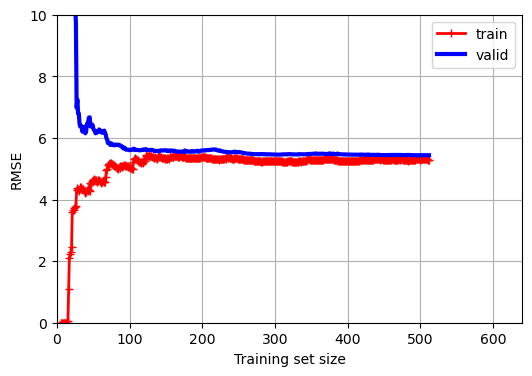

In [42]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X_train, y_train, train_sizes=np.linspace(0.01, 1.0, 640), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 640, 0, 10])
plt.show()

Model 2 - Stochastic Gradient Descent Regressor

In [61]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=2000,tol=1e-5,penalty=None,eta0=0.01,n_iter_no_change=100,random_state=42)
sgd_reg.fit(X_train,y_train.ravel())

SGDRegressor(max_iter=2000, n_iter_no_change=100, penalty=None, random_state=42,
             tol=1e-05)

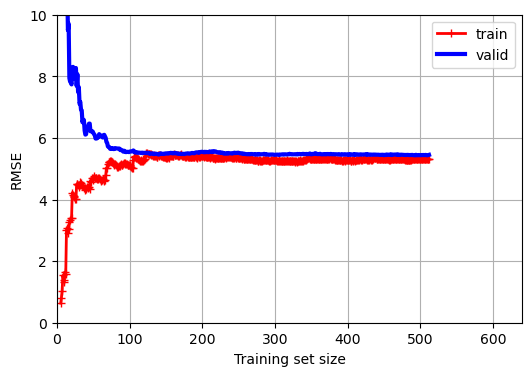

In [45]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    SGDRegressor(), X_train, y_train, train_sizes=np.linspace(0.01, 1.0, 640), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 640, 0, 10])
plt.show()

In [62]:
y_train_pred_sgd = sgd_reg.predict(X_train)
print(evaluate_model(y_train,y_train_pred_sgd))

(28.14456275479473, 5.305144932496636, 0.8768845264403649)


insights: 
Model 1 and Model 2 have given similar outputs

Model 3 - Ridge Regression

In [85]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.39)
ridge.fit(X_train,y_train)

Ridge(alpha=1.39)

In [86]:
y_train_pred_ridge = ridge.predict(X_train)
print(evaluate_model(y_train,y_train_pred_ridge))

(28.152189032804813, 5.305863646269551, 0.8768511660774099)


Hyperparameter Tuning for alpha in Ridge Model

In [84]:
from sklearn.linear_model import RidgeCV
alphas = [1.385,1.39]
ridge_hpt=RidgeCV(alphas=alphas,cv=5)
ridge_hpt.fit(X_train,y_train)
print('Best alpha:',ridge_hpt.alpha_)

Best alpha: 1.39


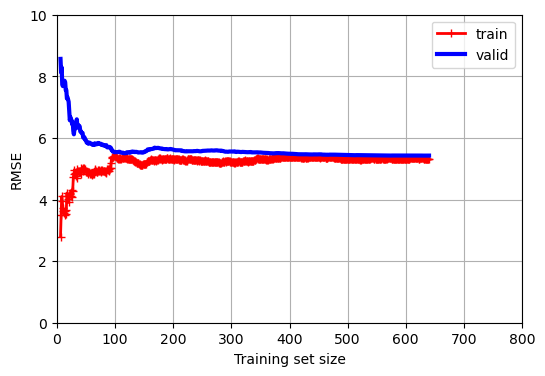

In [58]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    ridge, X_train_full, y_train_full, train_sizes=np.linspace(0.01, 1.0, 800), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 800, 0, 10])
plt.show()

Model 4 - Lasso Regression

In [79]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train,y_train)

y_train_pred_lasso = lasso_reg.predict(X_train)
print(evaluate_model(y_train,y_train_pred_lasso))

(28.152645318969128, 5.3059066443887914, 0.8768491701008624)


In [81]:
#Lasso Model HaperParameterTuning
from sklearn.linear_model import LassoCV
alphas = [0.001,0.002,0.003,0.004,0.005,0.006,0.006,0.007,0.008,0.009,0.01,0.1,1]
lasso_hpt=LassoCV(alphas=alphas,cv=5)
lasso_hpt.fit(X_train,y_train)
print('Best alpha:',lasso_hpt.alpha_)

Best alpha: 0.01


Model 5 - Elastic Net Regression

In [92]:
from sklearn.linear_model import ElasticNetCV
alphas = [0.001,0.002,0.003,0.004,0.005,0.006,0.006,0.007,0.008,0.009,0.01,0.1,1]
l1_ratio = [0.,0.1,0.2,0.3,0.4,0.5,0.6,.7,0.8,0.9]
Elastic_hpt=ElasticNetCV(alphas=alphas,l1_ratio=l1_ratio,cv=5)
Elastic_hpt.fit(X_train,y_train)
print('Best alpha:',Elastic_hpt.alpha_)
print('Best l1_ration:',Elastic_hpt.l1_ratio_)

Best alpha: 0.004
Best l1_ration: 0.0


In [102]:
from sklearn.linear_model import ElasticNet

EN_reg = ElasticNet(alpha = 0,l1_ratio=0)
EN_reg.fit(X_train,y_train)
y_train_pred_EN = EN_reg.predict(X_train)
print(evaluate_model(y_train,y_train_pred_EN))

(28.142839157236562, 5.304982484159261, 0.8768920661392917)


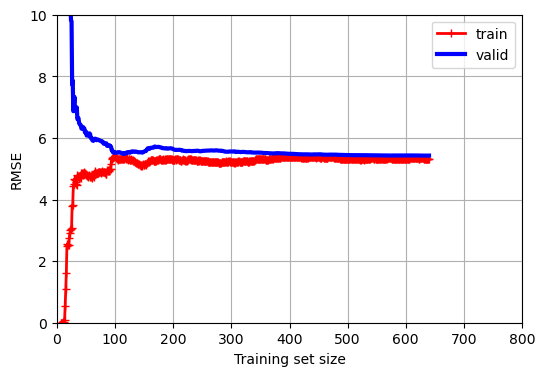

In [103]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    EN_reg, X_train_full, y_train_full, train_sizes=np.linspace(0.01, 1.0, 800), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 800, 0, 10])
plt.show()

Model 6 SVM Regressor

In [111]:
from sklearn.svm import SVR

svr = SVR(epsilon=0)
svr.fit(X_train,y_train)

y_train_pred_svr = svr.predict(X_train)
print(evaluate_model(y_train,y_train_pred_svr))

(47.67703788365351, 6.904856108830474, 0.7914417378551497)


Model 7 - Decision Tree

In [140]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
dt_reg.fit(X_train,y_train)

y_train_pred_dt = dt_reg.predict(X_train)
print(evaluate_model(y_train,y_train_pred_dt))

(42.493143972181464, 6.518676550664365, 0.8141181446394429)


In [141]:
y_valid_pred_dt = dt_reg.predict(X_valid)

In [142]:
print(evaluate_model(y_valid,y_valid_pred_dt))

(50.954796227984694, 7.138262829847658, 0.7576483851583997)


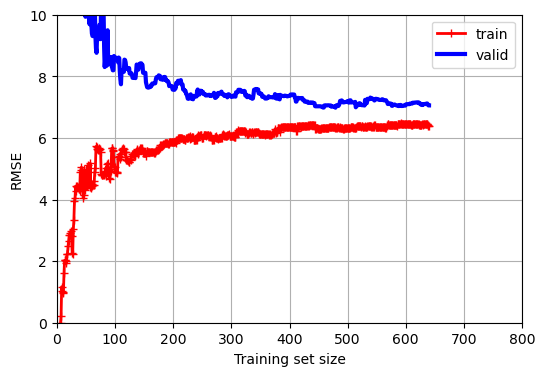

In [143]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    dt_reg, X_train_full, y_train_full, train_sizes=np.linspace(0.01, 1.0, 800), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 800, 0, 10])
plt.show()

Model 8 RandomForest Regressor

In [144]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_regressor = RandomForestRegressor(random_state=42)

# Grid search using cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test set score:", test_score)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Test set score: 0.8472439461548139
